<font color="red" size="7">Dimensionality Reduction</font>

<font color="red" size="5">5_Uniform Manifold Approximation and Projection (UMAP)</font>

**Uniform Manifold Approximation and Projection (UMAP)** is a non-linear dimensionality reduction technique similar to t-SNE but with several advantages, such as being computationally more efficient and scalable to large datasets. UMAP is designed to preserve both local and global structure, making it a great choice for visualizing high-dimensional data while maintaining the global relationships between points.

**Key Concepts of UMAP**

<ol>
<font color = "yellow"><li>Manifold Learning:</font>
    UMAP is based on manifold learning, assuming that high-dimensional data lies on a low-dimensional manifold. It attempts to preserve the structure of this manifold when projecting the data to lower dimensions.</li>
    
<font color = "yellow"><li>Preserving Local and Global Structure:</font>
    UMAP focuses on preserving both local neighborhoods (similarity) and global structure (clusters and distances).</li>
    
<font color = "yellow"><li>Metric for Similarity:</font> 
    UMAP uses a Riemannian manifold approach and computes a distance metric that reflects the proximity of data points in high-dimensional space. UMAP learns a lower-dimensional projection that best preserves these distances.</li>
    
<font color = "yellow"><li>Efficiency:</font> 
    UMAP is faster than t-SNE, especially for large datasets, and scales well due to its efficient graph-based optimization.</li></ol>

In [2]:
#pip install umap-learn[plot]

  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl.metadata (2.8 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-win_amd64.whl.metadata (4.9 kB)
  Using cached dask-2023.5.0-py3-none-any.whl.metadata (3.6 kB)
     ---------------------------------------- 0.0/76.5 kB ? eta -:--:--
     --------------------- ------------------ 41.0/76.5 kB 2.0 MB/s eta 0:00:01
     ----------------------------------- -- 71.7/76.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 76.5/76.5 kB 529.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached PyWavelets-1.4.1-cp38-cp38-win_amd64.whl.metadata (1.9 kB)
  Using cached partd-1.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached locket-1.0.0-py2.py3-none-any.w

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns
import pandas as pd

In [3]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply UMAP: We use umap.UMAP to reduce the data to 2 dimensions for visualization. The n_components=2 parameter specifies that we want to reduce the data to 2 dimensions. The random_state=42 ensures reproducibility.

In [4]:
# Apply UMAP to reduce to 2 dimensions
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)


C:\Users\root\anaconda3\envs\mydl\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [5]:
# Create a DataFrame for visualization
import pandas as pd
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['target'] = y


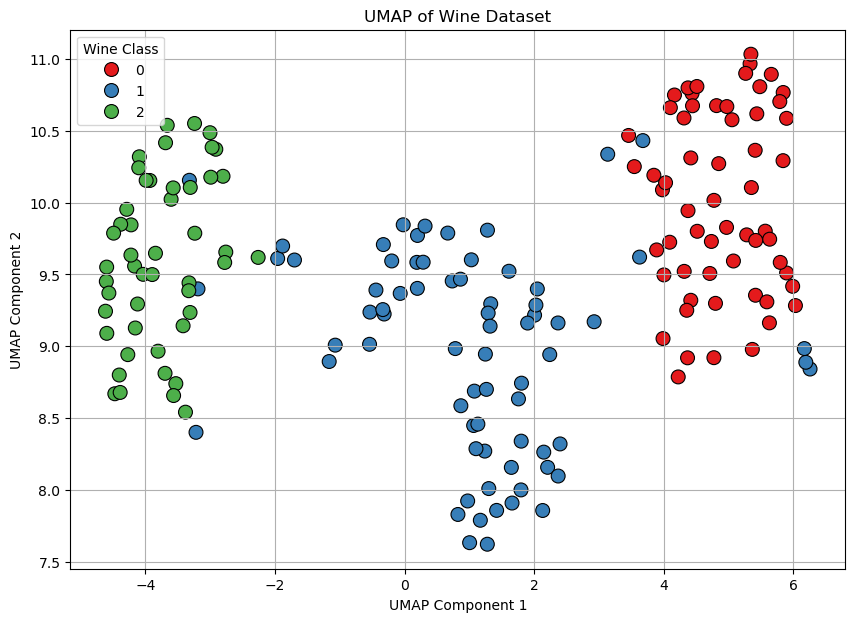

In [6]:
# Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='target', palette='Set1', data=umap_df,
    s=100, edgecolor='k'
)
plt.title('UMAP of Wine Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Wine Class')
plt.grid()
plt.show()

**Key Outputs**

<ol>
<font color = "yellow">Scatter Plot:</font>
        The plot shows the wine samples projected into a 2D space using UMAP. Points are color-coded by wine class, and we should see clusters of samples that belong to different cultivars (wine classes). UMAP attempts to preserve both local structure (similar wine samples being close to each other) and global structure (class separation).</ol>

**Interpretation:**

<ol>
<font color = "yellow"><li>Clusters:</font>
    If the wine cultivars (classes) are well-separated, it indicates that UMAP has successfully captured the structure of the data.</li>
    
<font color = "yellow"><li>Local Structure:</font> 
    Similar wine samples (based on their chemical properties) should be grouped together in the plot, showing that UMAP preserves local similarities.</li></ol>

**Advantages of UMAP**

<ol>
<font color = "yellow"><li>Scalability:</font> 
    UMAP is computationally efficient and can handle larger datasets than t-SNE. It is faster and scales better.</li>
    
<font color = "yellow"><li>Preserves Both Local and Global Structure:</font> 
    UMAP is designed to preserve both the local neighborhood relationships and the global structure of the data, making it better for datasets where understanding both local and global patterns is important.</li>
    
<font color = "yellow"><li>Flexibility:</font>  
    UMAP can handle a wide variety of distance metrics, making it adaptable to different types of data.</li>
    
<font color = "yellow"><li>Reproducibility:</font>  
    The results of UMAP are more stable than t-SNE, with less sensitivity to random initialization.</li></ol>


**Limitations of UMAP**

<ol>
<font color = "yellow"><li>Interpretability:</font>  
        Like t-SNE, UMAP is a non-linear method, and the axes of the reduced space do not have a direct, interpretable meaning.</li>

<font color = "yellow"><li>Parameter Tuning:</font>  
    UMAP has a few important parameters, such as the number of neighbors (n_neighbors) and the minimum distance (min_dist), which control how tightly data points are clustered in the lower-dimensional space. Selecting appropriate values for these parameters may require experimentation.</li></ol>

**Applications of UMAP**

<ol>
<font color = "yellow"><li>Visualization:</font>  
    UMAP is widely used for visualizing high-dimensional datasets in lower dimensions (2D or 3D), helping reveal structure and clusters.</li>
    
<font color = "yellow"><li>Exploratory Data Analysis:</font>  
    It’s helpful for discovering patterns, groups, or outliers in datasets.</li>
    
<font color = "yellow"><li>Clustering:</font> 
    UMAP can assist in clustering tasks, particularly when dealing with complex data where traditional clustering algorithms may not perform well.</li>

<font color = "yellow"><li>Dimensionality Reduction:</font> 
    UMAP can be used as a pre-processing step for other machine learning algorithms, especially when working with high-dimensional data.</li></ol>